- Exercice  semaine 7 - data science
- Date limite de soumission des réponses: jeudi  04 mai 2023 à 12h
- Discussion en ligne/présentiel : Vendredi  05 mai 2023 de 16h à 18h
- Thématiques abordées : Scikit-learn et modèles de régression de machine learning

- Instructions : Utilisez Python ou R pour traiter les questions. Aucune autre application logicielle n’est acceptée pour l’analyse des données. Il est souhaitable de fournir votre éditeur de codes annoté avec votre devoir. 
- Le travail de cette semaine porte sur la base des données nommée «Cameroon_lung_function » et disponible à l’adresse URL : 
https://raw.githubusercontent.com/pefura/IFPERA/main/Cameroon_lung_function.csv
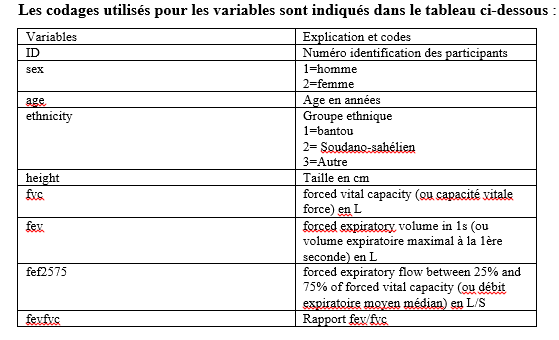


In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "C:/Users/DDD/Documents/Cameroon_lung_function/Cameroon_lung_function.csv"
dataset = pd.read_csv(url)

In [5]:
dataset.head(3)

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
1,1000948,1,4.95,1,109,1.23,1.12,1.39,0.91
2,500921,1,5.00,1,119,1.10,1.10,1.81,1.00
3,1000157,1,5.40,1,107,0.97,0.91,1.70,0.94


## I. Partie 1

### 1.	Importer la base de données « Cameroon_lung_function »  dans votre environnement de travail et nommer cette base « data » après importation. Montrer la preuve de la réussite de l’importation. 

In [6]:
data = dataset.copy()
data.tail(3)

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
1775,1995,2,81.160849,1,160,1.70,1.26,2.96,0.74
1776,1722,2,85.232033,1,170,2.31,2.04,4.35,0.88
1777,1469,2,88.131417,1,160,2.27,1.65,3.92,0.73


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 1 to 1777
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1777 non-null   int64  
 1   sex        1777 non-null   int64  
 2   age        1777 non-null   float64
 3   ethnicity  1777 non-null   int64  
 4   height     1777 non-null   int64  
 5   fvc        1777 non-null   float64
 6   fev        1777 non-null   float64
 7   fef2575    1777 non-null   float64
 8   fevfvc     1777 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 138.8 KB


In [16]:
data.sex.value_counts()

2    935
1    842
Name: sex, dtype: int64

### 2.	Sélectionner la sous-base de données (que vous nommerez data_male) contenant uniquement les données des sujets de sexe masculin et les variables age, height et fev.

In [9]:
df = data.query('sex==1')
data_male = df[["age", "height", "fev"]]
data_male.shape

(842, 3)

In [17]:
data_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 1 to 842
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     842 non-null    float64
 1   height  842 non-null    int64  
 2   fev     842 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 26.3 KB


### 3.	Décrire numériquement et graphiquement les 3 variables de la base « data_male ».

In [10]:
# Description numérique
data_male.describe()

,age,height,fev
count,842.000000,842.000000,842.000000
mean,28.243708,161.933492,2.814228
std,17.739684,18.336733,1.002225
min,4.950000,103.000000,0.840000
25%,13.422500,154.000000,1.960000
50%,24.691307,168.000000,2.930000
75%,38.247091,175.000000,3.540000
max,87.159480,196.000000,5.910000


<IPython.core.display.Javascript object>

<ipython-input-11-41d778a9763a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = data.iloc[:,0:6].hist(ax = ax, bins=bins, grid= False, edgecolor = "black", color = "blue")


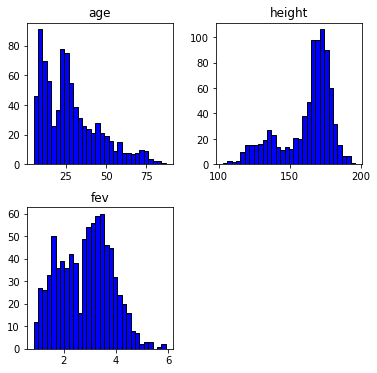

In [11]:
def multi_hist(data, bins):
    fig = plt.figure (figsize= (6,6))
    ax = fig.gca()
    hist = data.iloc[:,0:6].hist(ax = ax, bins=bins, grid= False, edgecolor = "black", color = "blue")
    
multi_hist(data= data_male, bins=30)

### 4.	Décrire graphiquement la relation entre fev (variable expliquée) et l’âge d’une part et entre fev et la taille d’autre part. Quelles conclusions pouvez-vous tirer ?

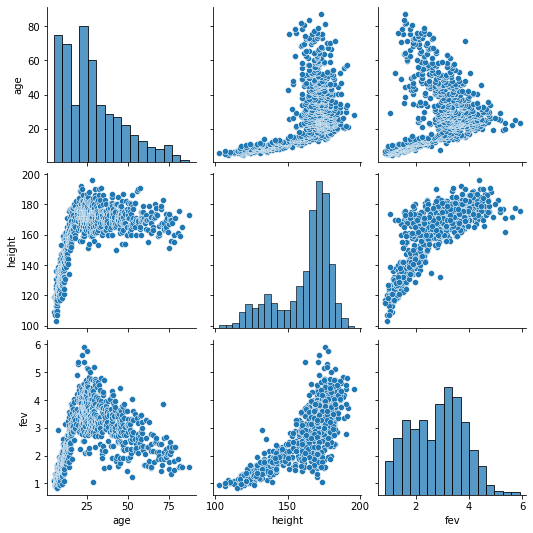

In [12]:
# Description graphique
import seaborn as sns
sns.pairplot(data_male)

## Conclusion: relation non linéaire, demi-parabole pour realtaionnfev = f(height;  et pour l'âge: agmentation en pete brute
# jusqu'à 25 ans puis décroissance progressive. 

### 5.Quelles sont les métriques utilisées pour comparer les modèles de régression en machine learning.   

- MAE
- MSE
- RMSE
- MeAE
- ME
- R2, AIC, BIC...

# II. Partie 2
Dans cette partie les données de data_male seront utilisées pour développer les modèles de régression permettant de prédire « fev ». 

### 6.Faire une analyse prédictive de « fev » avec les modèles suivants : K Neighbors Regressor, Gradient Boosting Regressor et Random Forest Regressor. 

In [13]:
# Defining target(y) and features (X)
y = data_male['fev']
X = data_male.drop(columns =['fev'])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (842, 2)
y shape: (842,)


In [86]:
# UTILISATION PROBLEMATIQUE POUR OBETENIR LES PREPROCESSING
def preprocessing (data):
    # Defining target(y) and features (X)
    y = data['fev']
    X = data.drop(columns =['fev'])
    # splitting data into trianing and test sets
    from sklearn.model_selection import train_test_split
    X0_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
    # for split verification
    print("X0_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
    # Normalise data for KNN and other models needed scaling
    from sklearn.preprocessing import RobustScaler
    scaler= RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X0_train, X_test, y_train, y_test, X_train_scaled,  X_test_scaled
    

In [87]:
preprocessing(data=data_male)

X0_train shape: (673, 2)
y_train shape: (673,)
X_test shape: (169, 2)
y_test shape: (169,)


(           age  height
 839  81.108830     176
 3     5.400000     107
 834  77.163587     168
 478  26.863792     170
 240  14.670000     160
 ..         ...     ...
 836  78.086242     155
 193  12.260000     142
 630  37.823409     160
 560  31.123888     182
 685  44.257358     170
 
 [673 rows x 2 columns],
            age  height
 402  24.202601     172
 668  42.039699     167
 645  40.142368     169
 765  56.057495     170
 671  42.488706     166
 ..         ...     ...
 832  76.145106     170
 669  42.020534     175
 745  52.175222     180
 250  15.170000     158
 383  23.293634     178
 
 [169 rows x 2 columns],
 839    1.58
 3      0.91
 834    2.30
 478    3.90
 240    2.29
        ... 
 836    1.47
 193    2.09
 630    2.53
 560    3.19
 685    2.70
 Name: fev, Length: 673, dtype: float64,
 402    3.01
 668    3.03
 645    3.48
 765    3.18
 671    1.81
        ... 
 832    1.35
 669    3.62
 745    3.31
 250    2.88
 383    3.42
 Name: fev, Length: 169, dtype: float64,
 a

In [14]:
# Example, import a module to split dataset in train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (673, 2)
y_train shape: (673,)
X_test shape: (169, 2)
y_test shape: (169,)


In [15]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 2.2743541 ,  0.36363636],
       [-0.7755425 , -2.77272727],
       [ 2.11542173,  0.        ],
       ...,
       [ 0.53062012, -0.36363636],
       [ 0.2607329 ,  0.63636364],
       [ 0.78980892,  0.09090909]])

In [16]:
# KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor()

In [21]:
# Recherche des hyperparamètres optimaux: KNN
## Please use : sklearn.metrics.get_scorer_names(), to find right metric
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(n_neighbors=np.arange(1,100))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(KNN_reg, distributions, random_state=0,  scoring = "neg_root_mean_squared_error")
search =  Rand_CV.fit(X_train_scaled, y_train)
 
search.best_params_  # Meilleurs paramètres

{'n_neighbors': 56}

In [18]:
sklearn.metrics.get_scorer_names() 

<IPython.core.display.Javascript object>

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [24]:
KNN_reg_final = KNeighborsRegressor(n_neighbors=56)

# Calcul du score obtenu durant la validation croisée pour le modèle de KNN avce les hyperparamètres optimaux
from sklearn.model_selection import cross_val_score

cross_validation =10
score_RSME_KNN = cross_val_score(KNN_reg_final, X_train_scaled, y_train, cv=cross_validation, scoring ="neg_root_mean_squared_error")
print('score folds RSME KNN')
print(score_RSME_KNN)
print('Mean RSME KNN:', '{:.3f}'.format(score_RSME_KNN.mean()))

score folds RSME KNN
[-0.58734902 -0.55705861 -0.47564607 -0.5162596  -0.55685336 -0.48419613
 -0.53119506 -0.47138722 -0.59841746 -0.4414554 ]
Mean RSME KNN: -0.522


In [26]:
# RF model
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor (random_state=0)

# Recherche des hyperparamètres optimaux: random Forest
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(RF_reg, distributions, random_state=0, scoring = 'roc_auc')
search =  Rand_CV.fit(X_train, y_train)
 
search.best_params_  # Meilleurs paramètres

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

{'n_estimators': 92, 'max_depth': 6}

In [51]:
RF_reg_final= RandomForestRegressor(max_depth=6, n_estimators=92, random_state=0)
cross_validation =10
score_RSME_RF = cross_val_score(RF_reg_final, X_train, y_train, cv=cross_validation, scoring ="neg_root_mean_squared_error")
print('score folds RSME RF')
print(score_RSME_RF)
print('Mean RSME KNN:', '{:.3f}'.format(score_RSME_RF.mean()))

score folds RSME RF
[-0.55572338 -0.537406   -0.48336422 -0.49718128 -0.59938651 -0.4744824
 -0.52803338 -0.47850271 -0.59932688 -0.48342669]
Mean RSME KNN: -0.524


In [28]:
# Gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
GB_reg = GradientBoostingRegressor (random_state=0)

distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(GB_reg, distributions, random_state=0, scoring = "neg_root_mean_squared_error")
search =  Rand_CV.fit(X_train, y_train)
 
search.best_params_  # Meilleurs paramètres

{'n_estimators': 225, 'max_depth': 2}

In [52]:
GB_reg_final= GradientBoostingRegressor(max_depth=2, n_estimators=225, random_state=0)
cross_validation =10
score_RSME_GB = cross_val_score(GB_reg_final, X_train, y_train, cv=cross_validation, scoring ="neg_root_mean_squared_error")
print('score folds RSME GB')
print(score_RSME_RF)
print('Mean RSME GB:', '{:.3f}'.format(score_RSME_GB.mean()))

score folds RSME GB
[-0.55572338 -0.537406   -0.48336422 -0.49718128 -0.59938651 -0.4744824
 -0.52803338 -0.47850271 -0.59932688 -0.48342669]
Mean RSME GB: -0.538


In [30]:
RSME_KNN = score_RSME_KNN.mean()
RSME_RF = score_RSME_RF.mean()
RSME_GB = score_RSME_GB.mean()
type(RSME_GB)

numpy.float64

In [53]:
RSME = pd.DataFrame([RSME_KNN, RSME_RF, RSME_GB]).T
RSME.columns = ["KNN", "Random Forest", "Gradient boosting"]
RSME_t = RSME.T

RSME_t.columns = ["Cross validation negative RSME"]
RSME_t

,Cross validation negative RSME
KNN,-0.521982
Random Forest,-0.524666
Gradient boosting,-0.538420


In [82]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Courbe d'apprentissage du KNN
N, train_score_RF, val_score_RF = learning_curve(RF_reg_final, X_train, y_train,  scoring='neg_root_mean_squared_error',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

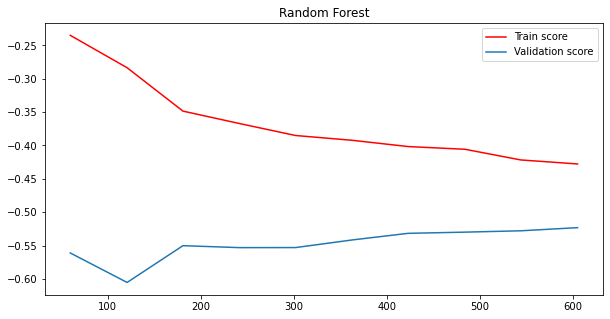

In [84]:
# Representation graphique des differentes courbes
figure, axis = plt.subplots(figsize=(10, 5))

# For Random Forest
axis.plot(N, train_score_RF.mean(axis=1), color = "red")    
axis.plot(N, val_score_RF.mean(axis=1))
axis.set_title("Random Forest")
axis.legend(['Train score', 'Validation score'])
axis.grid(visible = None)

### 7.	Quel est le modèle le plus performant des 3 modèles étudiés à la question 6. 

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from RegscorePy import *

def evaluation(model, X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MeAE = median_absolute_error(y_test, y_pred)
    AIC= aic.aic(y_test, y_pred, 2)
    BIC = bic.bic(y_test, y_pred, 2)
    print('R2:', round(R2, 3))
    print('MSE:', round(MSE, 3))
    print('MeAE:', round(MeAE, 3))
    print('RMSE:', round(np.sqrt(MSE),3))
    print('AIC:', round(AIC,3))
    print('BIC:', round(BIC,3))

In [55]:
X_test_scaled = scaler.transform(X_test)
print("KNN regression metrics")
evaluation(model=KNN_reg_final, X_train = X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)

KNN regression metrics
R2: 0.775
MSE: 0.222
MeAE: 0.265
RMSE: 0.471
AIC: -250.432
BIC: -244.172


In [61]:
print("RF regression metrics")
evaluation(model=RF_reg_final, X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test)

RF regression metrics
R2: 0.769
MSE: 0.228
MeAE: 0.283
RMSE: 0.477
AIC: -245.871
BIC: -239.612


In [65]:
print("GB regression metrics")
evaluation(model=GB_reg_final, X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test)

GB regression metrics
R2: 0.772
MSE: 0.225
MeAE: 0.26
RMSE: 0.474
AIC: -248.082
BIC: -241.822


In [ ]:
# Meilleur modèle: KNN puis GB puis RF

### 8.	Construire une application permettant de prédire fev médian ainsi que les limites inférieures et supérieures de fev (le modèle Gradient Boosting Regressor permet de calculer les limites supérieures et inférieures). 

In [66]:
from sklearn.metrics import mean_pinball_loss, mean_squared_error

all_models = {}
common_params = dict(
    n_estimators=225,
    max_depth=2,
)
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X_train, y_train)

In [67]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results = []
for name, gbr in sorted(all_models.items()):
    metrics = {"model": name}
    y_pred = gbr.predict(X_train)
    for alpha in [0.05, 0.5, 0.95]:
        metrics["pbl=%1.2f" % alpha] = mean_pinball_loss(y_train, y_pred, alpha=alpha)
    metrics["MSE"] = mean_squared_error(y_train, y_pred)
    results.append(metrics)

pd.DataFrame(results).set_index("model").style.apply(highlight_min)

,pbl=0.05,pbl=0.50,pbl=0.95,MSE
model,,,,
q 0.05,0.044039,0.367194,0.690350,0.861206
q 0.50,0.169869,0.171326,0.172782,0.236304
q 0.95,0.660490,0.352821,0.045152,0.760958


In [68]:
pred_median = GradientBoostingRegressor(loss="quantile", alpha=0.50).fit(X_train, y_train)
pred_LLN = GradientBoostingRegressor(loss="quantile", alpha=0.05).fit(X_train, y_train)
pred_ULN = GradientBoostingRegressor(loss="quantile", alpha=0.95).fit(X_train, y_train)

In [78]:
## Fonction de calcul
def prediction_FEV (age, height):
    fit_median = GradientBoostingRegressor(loss="quantile", alpha=0.50, random_state=0)
    fit_median.fit(X_train, y_train)
    fit_LLN= GradientBoostingRegressor(loss="quantile", alpha=0.05, random_state=0)
    fit_LLN.fit(X_train, y_train)
    fit_ULN= GradientBoostingRegressor(loss="quantile", alpha=0.95, random_state=0)
    fit_ULN.fit(X_train, y_train)
    var = {'age':[age],
        'height':[height]}
    X1 = pd.DataFrame (var)
    pred_median = fit_median.predict(X1)
    LLN = fit_LLN.predict(X1)
    ULN = fit_ULN.predict(X1)
    table = pd.DataFrame([LLN [0],pred_median[0], ULN[0]]).T
    table.columns = ["LLN", "median", "ULN"]
    return table

In [80]:
# Exemple de prédiction pour un sujet de 40 ans mesurant 170 cm de taille
prediction_FEV (age=80, height=170)

,LLN,median,ULN
0,1.519172,2.145457,3.196846
